    Lucas Tsunaki
    02.07.2024

In this example we simulate ambiguous resonances in multipulse quantum sensing with nitrogen vacancy (NV) centers in diamonds. This notebook closely follows the work of

As this is quite complex problem, physics discussions will be kept to a minimum here in favour of a focus to the code. For a detailed explanation of the problem, please refer to the original paper.

**Table of contents**<a id='toc0_'></a>    
- 1. [Nitrogen Vacancy Centers in Diamonds](#toc1_)    
- 2. [Field Misalignement and $^{15}$N Coupling](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np

# 1. <a id='toc1_'></a>[Nitrogen Vacancy Centers in Diamonds](#toc0_)

We begin defining the quantum system from the predefined NV class in quaccatoo.

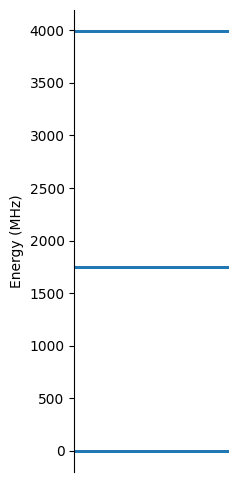

In [4]:
# import the NV class from QSys
from quaccatoo.QSys import NV

# define the NV center system
qsys = NV(
    N=15, # here we start considering the 15N nuclear spin
    B0 = 40, # external magnetic field in mT
    units_B0='mT'
)

# to visualize the energy levels we sue the plot_energy method
qsys.plot_energy()

Here we observe the three electronic energy levels of the NV center: $m_s=0,-1,+1$. To be able to observe the nuclear levels splitting, we need to specify a smaller energy range in the plot_energy method.

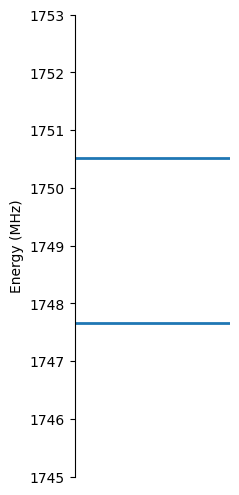

In [11]:
qsys.plot_energy(energy_lim=[1745, 1753])

Now, the splitting from the 15N nuclear spin is observed. So far we considered $B_0=40$, but if we want to see how these energy change as a function of the external magnetic field we can use the plot_energy_B0 function.

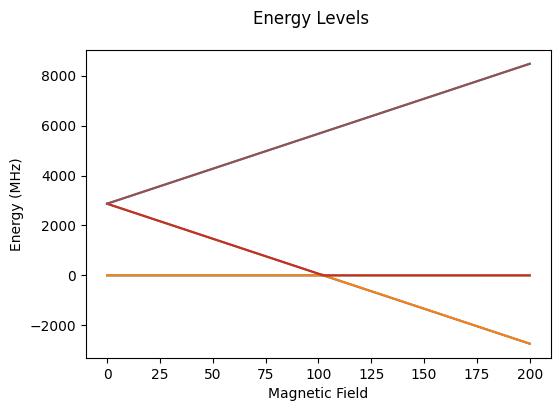

In [12]:
# import the plot_energy_B0 function from QSys
from quaccatoo.QSys import plot_energy_B0

# define the range of B0 values where we want to plot the energy levels
B0_array = np.linspace(0, 200, 100)

# plot the energy levels as a function of the external magnetic field
plot_energy_B0(
    B0 = B0_array,
    H0 = [NV(N=15, B0=B, units_B0='mT').H0 for B in B0_array] # here we calculate the Hamiltonian for each B0 value
)

As expected, the $m_s=+1$ grows linearly with the field, while the $m_s=-1$ decreases linearly and $m_s=0$ level is not affected by the field. After 100 mT the level anticrossing occur.

# 2. <a id='toc2_'></a>[Field Misalignement and 15N Coupling](#toc0_)

We 